In [2]:

import pandas as pd

DATA_PATH = "/home/hassan/Desktop/project/simplon/HR-Pulse/ml/data/jobs_data.csv"

if DATA_PATH:
  df = pd.read_csv(DATA_PATH)
else:
  print(f"File not fount at: {DATA_PATH.resolve()}")


In [3]:
# df["extracted_skills"] = extract_skills_in_batches(df, "Job Description")
# df['extracted_skills'].to_csv('extracted_skills_only.csv', index=False)

### Dataset exploration 

In [4]:
import ast
from collections import Counter

import pandas as pd

df_skills = pd.read_csv('extracted_skills_only.csv')

df_skills['extracted_skills'] = df_skills['extracted_skills'].apply(ast.literal_eval)

all_skills = [skill for sublist in df_skills['extracted_skills'] for skill in sublist]
skill_counts = Counter(all_skills)

top_skills = [skill for skill, count in skill_counts.most_common(50)]

for skill in top_skills:
    col_name = f"extracted_skills_{skill.replace(' ', '_')}"
    df_skills[col_name] = df_skills['extracted_skills'].apply(lambda x: 1 if skill in x else 0)

df_final_skills = df_skills.drop(columns=['extracted_skills'])
df_final_skills.to_csv('top_50_skills_binary.csv', index=False)

In [5]:
df_final_skills.head()

,extracted_skills_data,extracted_skills_python,extracted_skills_machine_learning,extracted_skills_computer_science,extracted_skills_data_science,extracted_skills_statistics,extracted_skills_business,extracted_skills_r,extracted_skills_design,extracted_skills_develop,...,extracted_skills_statistical,extracted_skills_modeling,extracted_skills_data_visualization,extracted_skills_programming,extracted_skills_systems,extracted_skills_designing,extracted_skills_leadership,extracted_skills_scala,extracted_skills_ai,extracted_skills_collaborative
0,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,1,1,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [6]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
len(df)

672

In [8]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [9]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='str')

In [10]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [11]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='str')

### Columns Analysis

#### Salary Estimate

In [12]:
df["Salary Estimate"]

0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: str

In [13]:
def clean_salary(df,  column_name="Salary Estimate"):
  salary = df[column_name].str.split("(").str[0]
  salary = salary.str.replace("K", "000").str.replace("$",'')

  df["min_salary"] = salary.str.split("-").str[0].astype(float)
  df["max_salary"] = salary.str.split("-").str[1].astype(float)

  df["salary_avg"] = (df["max_salary"] + df["min_salary"]) / 2

  return df.dropna(subset=['salary_avg'])

In [14]:
clean_df = clean_salary(df)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,salary_avg
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000.0,171000.0,154000.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000.0,171000.0,154000.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000.0,171000.0,154000.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0,171000.0,154000.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000.0,171000.0,154000.0


In [15]:
clean_df["salary_avg"].describe()

count       672.000000
mean     123663.690476
std       39580.267895
min       43500.000000
25%      103000.000000
50%      114000.000000
75%      136500.000000
max      271500.000000
Name: salary_avg, dtype: float64

#### Job Title

In [16]:
clean_df['Job Title'].unique()

<StringArray>
[                                                 'Sr Data Scientist',
                                                     'Data Scientist',
                           'Data Scientist / Machine Learning Expert',
                                   'Staff Data Scientist - Analytics',
                          'Data Scientist - Statistics, Early Career',
                                                       'Data Modeler',
                                         'Experienced Data Scientist',
                                          'Data Scientist - Contract',
                                                    'Data Analyst II',
                                              'Medical Lab Scientist',
 ...
 'Information Systems Engineering Specialist (Engineering Scientist)',
                 'Scientist/Research Associate-Metabolic Engineering',
            'Vice President, Biometrics and Clinical Data Management',
   'Enterprise Data Analyst (Enterprise Portfolio Manageme

In [17]:
clean_df['Job Title'].value_counts()

Job Title
Data Scientist                                                      337
Data Engineer                                                        26
Senior Data Scientist                                                19
Machine Learning Engineer                                            16
Data Analyst                                                         12
                                                                   ... 
Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics      1
Developer III - Data Science                                          1
Hydrogen/Tritium Materials Scientist (Experienced)                    1
Data Scientist/Data Analytics Practitioner                            1
AI/ML - Machine Learning Scientist, Siri Understanding                1
Name: count, Length: 172, dtype: int64

In [18]:
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'data analyst'
    elif 'machine learning' in title:
        return 'mle'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    else:
        return 'na'

clean_df['Job Title'] = clean_df['Job Title'].apply(title_simplifier)

In [19]:
clean_df['Job Title'].value_counts()

Job Title
data scientist    455
na                 69
data analyst       55
data engineer      47
mle                36
manager             7
director            3
Name: count, dtype: int64

In [20]:
clean_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,salary_avg
0,0,data scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000.0,171000.0,154000.0
1,1,data scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000.0,171000.0,154000.0
2,2,data scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000.0,171000.0,154000.0
3,3,data scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0,171000.0,154000.0
4,4,data scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000.0,171000.0,154000.0


#### Job Description

In [21]:
import re

import pandas as pd
from bs4 import BeautifulSoup


def clean_description(text):
  text = BeautifulSoup(text, "html.parser").get_text()
  text = re.sub(r'\s+', ' ', text)
  text = text.lower().strip()
  return text

clean_df['Job Description'] = clean_df['Job Description'].apply([clean_description])

In [22]:
def get_experience(text):
    exp = re.findall(r'(\d+)\+?\s*(?:year|yr)', text)
    if exp:
        return int(exp[0])
    return 0

clean_df['years_exp_required'] = clean_df['Job Description'].apply(get_experience)

In [23]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['Job Description'].tolist(), show_progress_bar=True)

/home/hassan/Desktop/project/simplon/HR-Pulse/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 545.43it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 21/21 [00:03<00:00,  5.97it/s]


In [24]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=384)
pca_features = pca.fit_transform(embeddings)

pca_columns = [f'desc_context_{i}' for i in range(384)]
df_embeddings = pd.DataFrame(pca_features, columns=pca_columns)

In [25]:
df_embeddings.head()

,desc_context_0,desc_context_1,desc_context_2,desc_context_3,desc_context_4,desc_context_5,desc_context_6,desc_context_7,desc_context_8,desc_context_9,...,desc_context_374,desc_context_375,desc_context_376,desc_context_377,desc_context_378,desc_context_379,desc_context_380,desc_context_381,desc_context_382,desc_context_383
0,-0.063199,-0.154863,-0.139226,-0.327903,0.001668,0.134949,0.009936,0.042422,0.138828,-0.022262,...,0.000844,-0.001262,0.003492,-0.000973,-0.000556,-0.002900,-0.001614,9.909514e-09,1.439561e-08,5.076282e-09
1,0.095253,-0.182485,-0.156483,0.018207,0.162483,-0.059028,0.034710,0.051891,0.011763,0.127379,...,-0.001868,0.000450,0.001455,-0.001636,-0.000528,0.001533,-0.003186,-2.901898e-08,-6.947730e-09,8.172301e-09
2,0.087010,-0.194784,-0.103223,-0.197532,-0.123733,-0.126231,0.081083,0.109062,0.057056,0.065012,...,-0.001153,-0.001568,-0.002795,-0.001784,0.000981,-0.000629,-0.000196,-8.054919e-08,7.761553e-09,3.615802e-09
3,0.034294,0.170758,0.279842,-0.044987,0.276192,0.156379,0.174369,0.058472,-0.092597,-0.198376,...,-0.003505,0.002048,0.000375,-0.001436,-0.000907,-0.003351,-0.000933,-9.236114e-08,1.184905e-08,-4.438325e-09
4,-0.016755,-0.078611,0.237554,0.031098,-0.010151,-0.043230,-0.049155,-0.134059,-0.088898,0.106554,...,-0.002023,-0.002329,-0.001493,0.001500,-0.002180,0.000873,0.000923,-3.399206e-08,1.017743e-08,-1.187786e-08


#### Rating

In [26]:
import numpy as np

clean_df['Rating'] = clean_df['Rating'].replace(-1, np.nan)
rating_median = df['Rating'].median()
clean_df['Rating'] = clean_df['Rating'].fillna(rating_median)

#### Revenue

In [27]:
clean_df['Revenue'].unique()

<StringArray>
[        'Unknown / Non-Applicable',           '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)',               '$10+ billion (USD)',
           '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
          '$5 to $10 billion (USD)',         '$10 to $25 million (USD)',
         '$25 to $50 million (USD)',        '$50 to $100 million (USD)',
           '$1 to $5 million (USD)',          '$5 to $10 million (USD)',
       'Less than $1 million (USD)',                               '-1']
Length: 14, dtype: str

In [28]:
revenue_map = {
    'Unknown / Non-Applicable': 0,
    '-1': 0,
    'Less than $1 million (USD)': 1,
    '$1 to $5 million (USD)': 2,
    '$5 to $10 million (USD)': 3,
    '$10 to $25 million (USD)': 4,
    '$25 to $50 million (USD)': 5,
    '$50 to $100 million (USD)': 6,
    '$100 to $500 million (USD)': 7,
    '$500 million to $1 billion (USD)': 8,
    '$1 to $2 billion (USD)': 9,
    '$2 to $5 billion (USD)': 10,
    '$5 to $10 billion (USD)': 11,
    '$10+ billion (USD)': 12
}

clean_df['Revenue'] = clean_df['Revenue'].map(revenue_map)

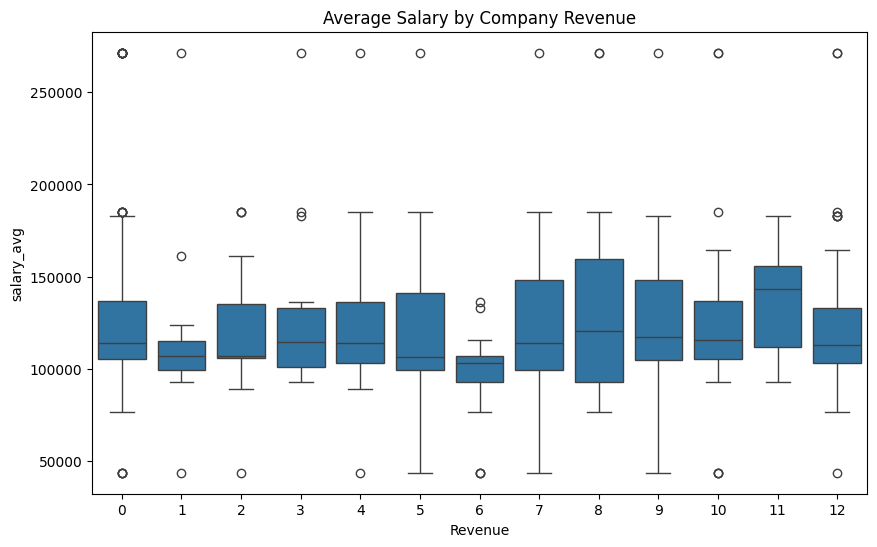

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Revenue', y='salary_avg', data=clean_df)
plt.title('Average Salary by Company Revenue')
plt.show()

In [30]:
original_len = len(clean_df)

Q1 = clean_df['salary_avg'].quantile(0.25)
Q3 = clean_df['salary_avg'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

clean_df = clean_df[
    (clean_df['salary_avg'] >= lower_limit) &
    (clean_df['salary_avg'] <= upper_limit)
]

print(f"Deleted rows: {original_len - len(clean_df)}")

Deleted rows: 41


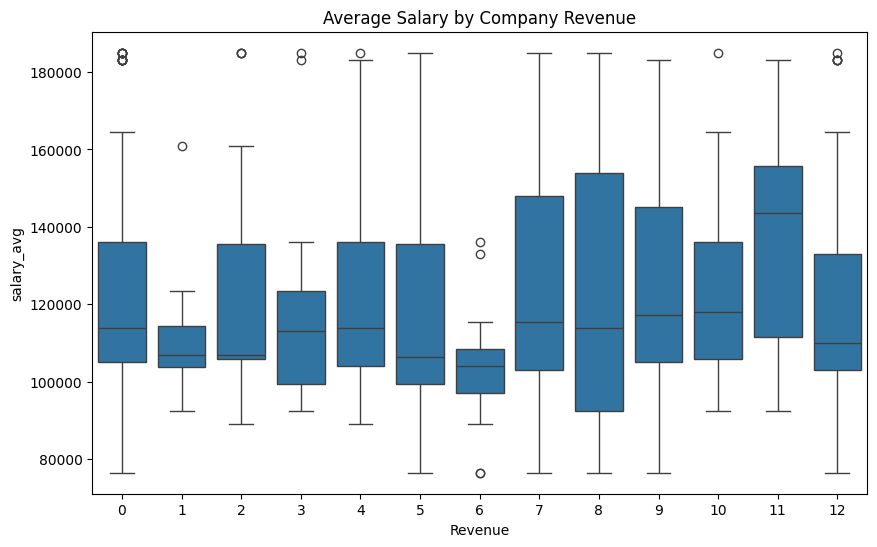

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Revenue', y='salary_avg', data=clean_df)
plt.title('Average Salary by Company Revenue')
plt.show()

In [32]:
clean_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,salary_avg,years_exp_required
0,0,data scientist,$137K-$171K (Glassdoor est.),description the senior data scientist is respo...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,0,"EmblemHealth, UnitedHealth Group, Aetna",137000.0,171000.0,154000.0,0
1,1,data scientist,$137K-$171K (Glassdoor est.),"secure our nation, ignite your future join the...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,9,-1,137000.0,171000.0,154000.0,15
2,2,data scientist,$137K-$171K (Glassdoor est.),overview analysis group is one of the largest ...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,7,-1,137000.0,171000.0,154000.0,0
3,3,data scientist,$137K-$171K (Glassdoor est.),job description: do you have a passion for dat...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,7,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0,171000.0,154000.0,0
4,4,data scientist,$137K-$171K (Glassdoor est.),data scientist affinity solutions / marketing ...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",137000.0,171000.0,154000.0,0


#### Company Name

In [33]:
clean_df['Company Name'] = clean_df['Company Name'].apply(lambda x: str(x).split('\n')[0])
clean_df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 631, dtype: str

#### Location

In [34]:
clean_df['Location'] = clean_df['Location'].apply(lambda x: x.split(',')[-1].strip() if ',' in str(x) else x)
clean_df['Location']

0      NY
1      VA
2      MA
3      MA
4      NY
       ..
667    NJ
668    CA
669    CA
670    CA
671    NY
Name: Location, Length: 631, dtype: str

In [35]:
clean_df['Location'].unique()

<StringArray>
[           'NY',            'VA',            'MA',            'CA',
            'IL',            'MO',            'WA',            'DC',
        'Remote',            'TN',            'TX',            'PA',
            'AZ',            'WI',            'GA',            'FL',
 'United States',            'NE',            'KS',            'NH',
            'NJ',            'LA',            'OH',            'IN',
            'MD',            'CO',          'Utah',    'New Jersey',
            'UT',            'OR',            'MI',            'SC',
            'MS',            'AL',            'RI',            'IA',
            'MN',            'OK',            'CT',            'NC',
         'Texas',    'California',            'WV']
Length: 43, dtype: str

In [36]:
clean_df['Location'].value_counts()

Location
CA               160
VA                85
MA                59
NY                48
MD                37
IL                29
DC                21
TX                16
WA                14
MO                12
PA                12
OH                12
NJ                10
CO                 9
TN                 8
GA                 8
FL                 8
United States      8
NC                 8
Remote             6
WI                 6
IN                 5
AZ                 4
MI                 4
AL                 4
OK                 4
CT                 4
NE                 3
UT                 3
IA                 3
MN                 3
NH                 2
Utah               2
New Jersey         2
OR                 2
SC                 2
RI                 2
KS                 1
LA                 1
MS                 1
Texas              1
California         1
WV                 1
Name: count, dtype: int64

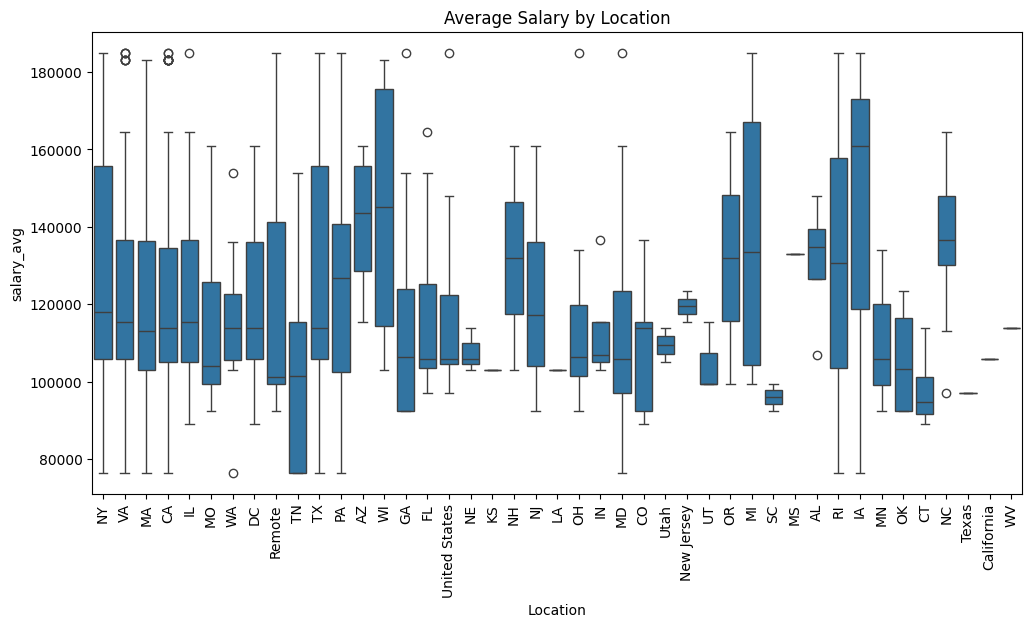

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='salary_avg', data=clean_df)
plt.xticks(rotation=90)
plt.title('Average Salary by Location')
plt.show()

In [38]:
state_map = {'California': 'CA', 'Texas': 'TX', 'New York': 'NY', 'Maryland': 'MD'}
clean_df['Location'] = clean_df['Location'].replace(state_map).str.strip()

top_12_locations = clean_df['Location'].value_counts().nlargest(12).index

clean_df['Location'] = clean_df['Location'].apply(
    lambda x: x if x in top_12_locations else 'Other'
)

print(clean_df['Location'].value_counts())

Location
CA       161
Other    124
VA        85
MA        59
NY        48
MD        37
IL        29
DC        21
TX        17
WA        14
MO        12
PA        12
OH        12
Name: count, dtype: int64


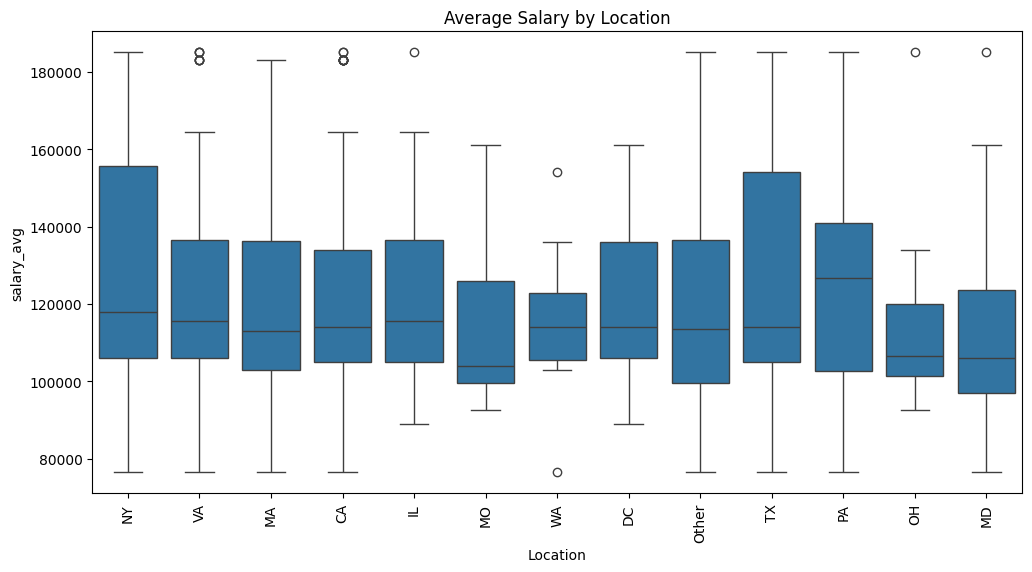

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='salary_avg', data=clean_df)
plt.xticks(rotation=90)
plt.title('Average Salary by Location')
plt.show()

#### Size

In [40]:
clean_df['Size'].unique()

<StringArray>
[ '1001 to 5000 employees', '5001 to 10000 employees',
   '501 to 1000 employees',     '51 to 200 employees',
        '10000+ employees',    '201 to 500 employees',
       '1 to 50 employees',                      '-1',
                 'Unknown']
Length: 9, dtype: str

In [41]:
import numpy as np

clean_df["Size"] = clean_df['Size'].replace(['-1', 'Unknown'], np.nan)

size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

size_map = {label: i for i, label in enumerate(size_order)}
clean_df["Size"] = clean_df["Size"].map(size_map)
clean_df["Size"] = clean_df["Size"].fillna(clean_df["Size"].median())
clean_df["Size"]

0      4.0
1      5.0
2      4.0
3      3.0
4      1.0
      ... 
667    4.0
668    3.0
669    3.0
670    0.0
671    4.0
Name: Size, Length: 631, dtype: float64

#### Type of ownership

In [42]:
clean_df['Type of ownership'].unique()

<StringArray>
[        'Nonprofit Organization',               'Company - Public',
        'Private Practice / Firm',              'Company - Private',
                     'Government', 'Subsidiary or Business Segment',
             'Other Organization',                             '-1',
                        'Unknown',                       'Hospital',
                  'Self-employed',           'College / University',
                       'Contract']
Length: 13, dtype: str

In [43]:
def group_ownership(x):
    if x in ['Company - Public', 'Subsidiary or Business Segment']:
        return 'Public_Co'
    elif x in ['Company - Private', 'Private Practice / Firm']:
        return 'Private_Co'
    elif x in ['Nonprofit Organization', 'College / University', 'Hospital']:
        return 'Nonprofit_Edu'
    elif x == 'Government':
        return 'Government'
    elif x in ['Self-employed', 'Contract']:
        return 'Independent'
    else:
        return 'Other_Unknown'

clean_df['Type of ownership'] = clean_df['Type of ownership'].apply(group_ownership)

In [44]:
clean_df['Type of ownership'].unique()

<StringArray>
['Nonprofit_Edu',     'Public_Co',    'Private_Co',    'Government',
 'Other_Unknown',   'Independent']
Length: 6, dtype: str

#### Sector

In [45]:
clean_df["Sector"].unique()

<StringArray>
[                         'Insurance',                  'Business Services',
                      'Manufacturing',             'Information Technology',
          'Biotech & Pharmaceuticals',                             'Retail',
       'Oil, Gas, Energy & Utilities',                         'Government',
                        'Health Care',                            'Finance',
                'Aerospace & Defense',                                 '-1',
         'Transportation & Logistics',                              'Media',
                 'Telecommunications',                        'Real Estate',
                   'Travel & Tourism',             'Agriculture & Forestry',
                          'Education',                 'Accounting & Legal',
 'Construction, Repair & Maintenance',                  'Consumer Services']
Length: 22, dtype: str

In [46]:
clean_df['Sector'] = clean_df['Sector'].replace('-1', 'Other')

In [47]:
clean_df['Sector'].value_counts()

Sector
Information Technology                180
Business Services                     110
Other                                  66
Biotech & Pharmaceuticals              62
Aerospace & Defense                    41
Insurance                              31
Finance                                31
Manufacturing                          22
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities            9
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   4
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      1
Consumer Services                       1
Name: count, dtype: int64

In [48]:
counts = clean_df['Sector'].value_counts()
sectors_to_keep = counts[counts >= 10].index

clean_df['Sector'] = clean_df['Sector'].apply(lambda x: x if x in sectors_to_keep else 'Other')

In [49]:
clean_df['Sector'].value_counts()

Sector
Information Technology       180
Other                        116
Business Services            110
Biotech & Pharmaceuticals     62
Aerospace & Defense           41
Insurance                     31
Finance                       31
Manufacturing                 22
Health Care                   21
Government                    17
Name: count, dtype: int64

#### Competitors

In [50]:
clean_df['Competitors'].value_counts()

Competitors
-1                                                             471
Roche, GlaxoSmithKline, Novartis                                 9
Leidos, CACI International, Booz Allen Hamilton                  6
Los Alamos National Laboratory, Battelle, SRI International      4
Commerce Signals, Cardlytics, Yodlee                             3
                                                              ... 
United Natural Foods, US Foods, DPI Specialty Foods              1
LivePerson, Salesforce, SAP                                      1
Zurich Insurance, AXA XL, Allianz                                1
CSC, ManTech, SAIC                                               1
Genomic Health, Myriad Genetics, The Broad Institute             1
Name: count, Length: 105, dtype: int64

In [51]:
clean_df.drop(columns=['Competitors'], inplace=True)

### Founded

In [52]:
clean_df['Founded'].isnull().sum()

np.int64(0)

In [53]:
negative_values = clean_df[clean_df['Founded'] < 0]['Founded']
len(negative_values)

109

In [54]:
clean_df = clean_df.dropna(subset=['Founded'])

### Feature Selection

In [55]:
clean_df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'salary_avg', 'years_exp_required'],
      dtype='str')

In [56]:
clean_df[[ 'Job Title', 'Job Description', 'Rating', 'Company Name', 'Location', 'Size', 'Type of ownership', 'Sector', 'Revenue', 'years_exp_required', 'salary_avg']]

,Job Title,Job Description,Rating,Company Name,Location,Size,Type of ownership,Sector,Revenue,years_exp_required,salary_avg
0,data scientist,description the senior data scientist is respo...,3.1,Healthfirst,NY,4.0,Nonprofit_Edu,Insurance,0,0,154000.0
1,data scientist,"secure our nation, ignite your future join the...",4.2,ManTech,VA,5.0,Public_Co,Business Services,9,15,154000.0
2,data scientist,overview analysis group is one of the largest ...,3.8,Analysis Group,MA,4.0,Private_Co,Business Services,7,0,154000.0
3,data scientist,job description: do you have a passion for dat...,3.5,INFICON,MA,3.0,Public_Co,Manufacturing,7,0,154000.0
4,data scientist,data scientist affinity solutions / marketing ...,2.9,Affinity Solutions,NY,1.0,Private_Co,Business Services,0,0,154000.0
...,...,...,...,...,...,...,...,...,...,...,...
667,data scientist,summary we’re looking for a data scientist to ...,3.6,TRANZACT,Other,4.0,Private_Co,Business Services,0,2,136000.0
668,data scientist,job description become a thought leader within...,3.8,JKGT,CA,3.0,Other_Unknown,Other,0,0,136000.0
669,data scientist,join a thriving company that is changing the w...,3.8,AccessHope,CA,3.0,Other_Unknown,Other,0,3,136000.0
670,data scientist,100 remote opportunity as an ainlp data scient...,5.0,ChaTeck Incorporated,CA,0.0,Private_Co,Business Services,2,5,136000.0


In [57]:
cat_cols = [ 'Job Title',  'Company Name', 'Location', 'Type of ownership', 'Sector']
num_cols = [ 'Rating', 'Size', 'Revenue', 'years_exp_required']

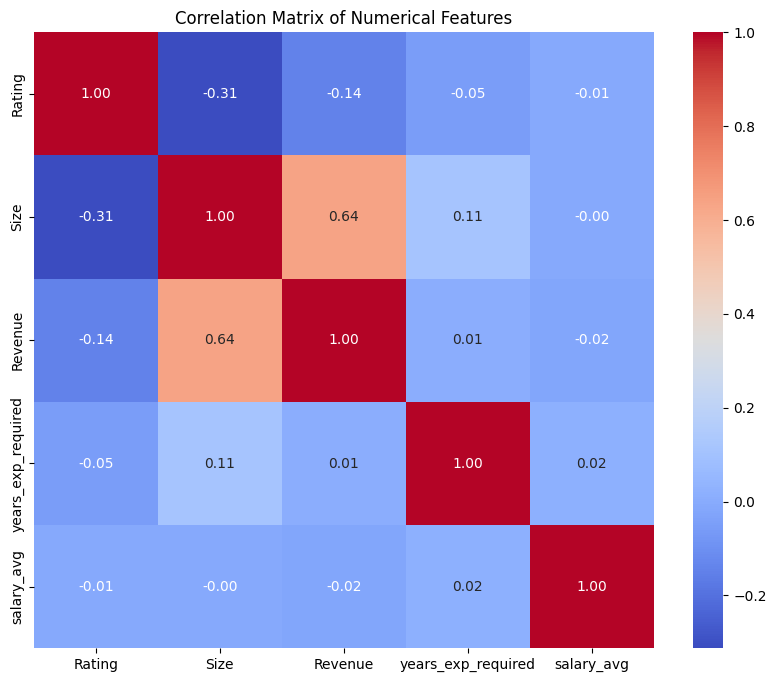

In [58]:
correlation_matrix = clean_df[num_cols + ['salary_avg']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

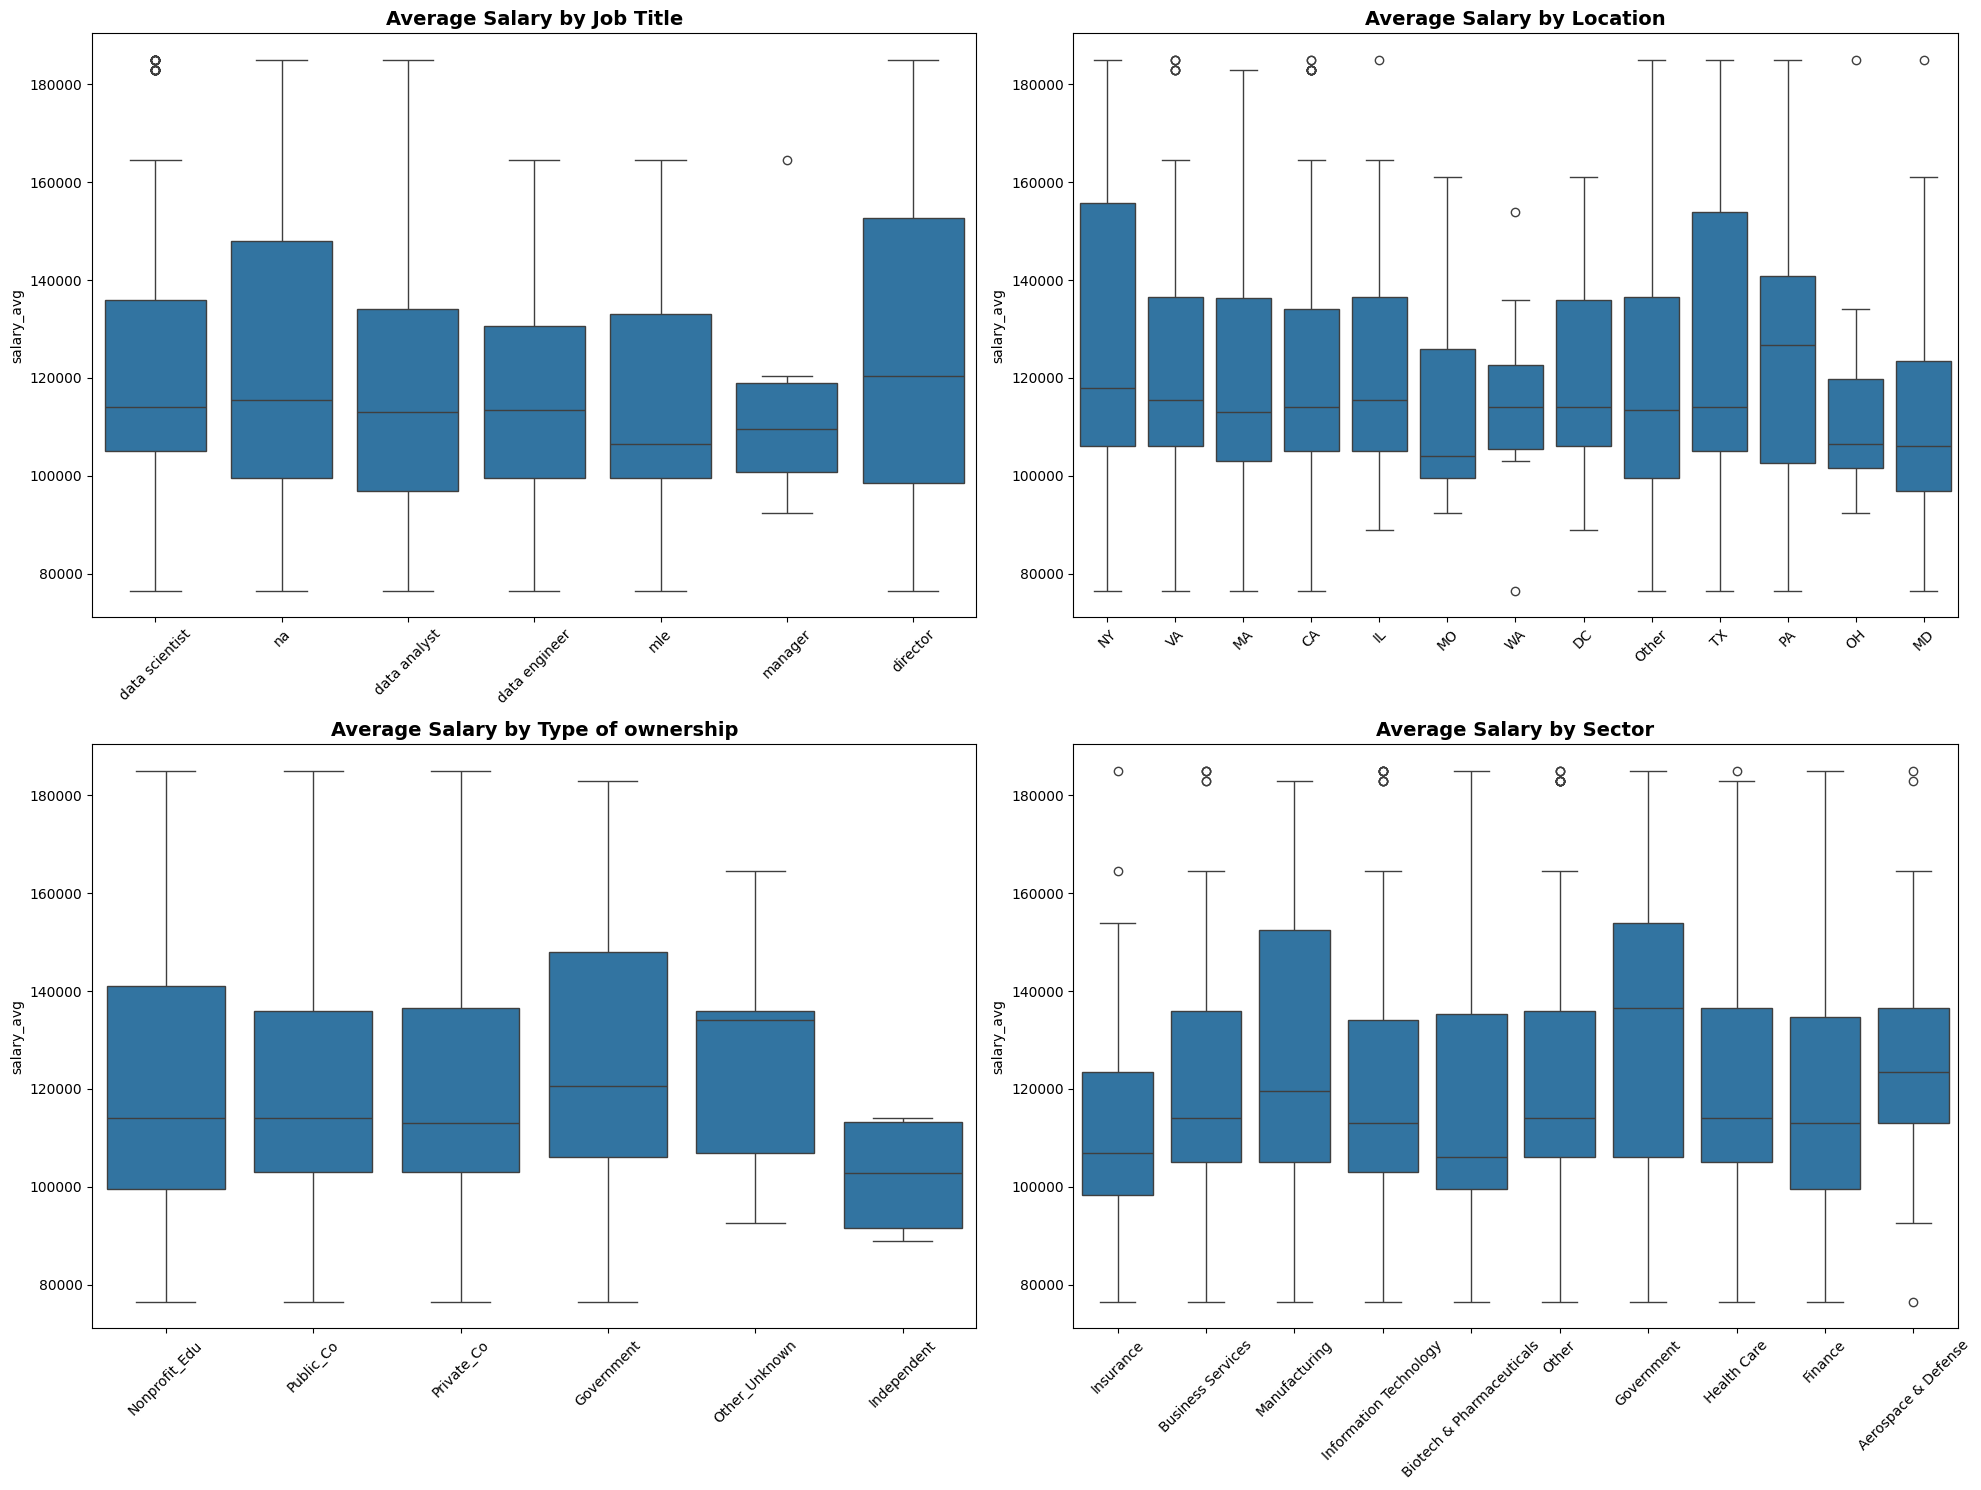

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Job Title', 'Location', 'Type of ownership', 'Sector']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

axes = axes.flatten()

for i, category in enumerate(cat_cols):
    sns.boxplot(ax=axes[i], x=category, y='salary_avg', data=clean_df)

    axes[i].set_title(f'Average Salary by {category}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [60]:
final_cols = ['Rating', 'years_exp_required',  # Numeric
    'Job Title', 'Location', 'Type of ownership', 'Sector', # Categorical
    'salary_avg' # Target
]

df_model = clean_df[final_cols].copy()
df_final = pd.get_dummies(df_model, columns=['Job Title', 'Location', 'Type of ownership', 'Sector'], drop_first=True)

In [61]:

df_final

,Rating,years_exp_required,salary_avg,Job Title_data engineer,Job Title_data scientist,Job Title_director,Job Title_manager,Job Title_mle,Job Title_na,Location_DC,...,Type of ownership_Public_Co,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Other
0,3.1,0,154000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,4.2,15,154000.0,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2,3.8,0,154000.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3.5,0,154000.0,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,2.9,0,154000.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3.6,2,136000.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
668,3.8,0,136000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
669,3.8,3,136000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
670,5.0,5,136000.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Data Preprocessing

In [62]:
df_skills = df_skills.drop(columns=['extracted_skills'])
df_skills

,extracted_skills_data,extracted_skills_python,extracted_skills_machine_learning,extracted_skills_computer_science,extracted_skills_data_science,extracted_skills_statistics,extracted_skills_business,extracted_skills_r,extracted_skills_design,extracted_skills_develop,...,extracted_skills_statistical,extracted_skills_modeling,extracted_skills_data_visualization,extracted_skills_programming,extracted_skills_systems,extracted_skills_designing,extracted_skills_leadership,extracted_skills_scala,extracted_skills_ai,extracted_skills_collaborative
0,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,1,1,1,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
668,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
669,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
670,1,1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,1,1


In [63]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

remaining_indices = clean_df.index

df_skills_filtered = df_skills.loc[remaining_indices].reset_index(drop=True)
df_embeddings_filtered = df_embeddings.loc[remaining_indices].reset_index(drop=True)

cols_to_encode = ['Job Title', 'Location', 'Type of ownership', 'Sector']
df_cat_encoded = pd.get_dummies(clean_df[cols_to_encode], drop_first=True, dtype=int).reset_index(drop=True)

clean_df_final = clean_df.reset_index(drop=True)

X = pd.concat([
    clean_df_final[['Rating', 'years_exp_required']],
    df_cat_encoded,
    df_skills_filtered,
    # df_embeddings_filtered
], axis=1)

y = clean_df_final['salary_avg']

print(f"- X: {X.shape[0]} rows, y: {len(y)} rows")

- X: 631 rows, y: 631 rows


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,           # Shallower trees are better for small/noisy data
    reg_lambda=10,         # L2 regularization to keep weights small
    alpha=1,               # L1 regularization to ignore useless features
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [65]:
preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"Average Error (MAE): ${mae:,.2f}")
print(f"Model Confidence (R2): {r2:.2f}")

Average Error (MAE): $23,598.86
Model Confidence (R2): -0.16
